# Best State of India

### The Six Traits

1. **[Life Expectancy](https://m.rbi.org.in/Scripts/PublicationsView.aspx?id=20671)**

> Data relating to Bihar, Madhya Pradhesh and Uttar Pradesh includes Jharkhand, Chhattisgarh and Uttarkhand, respectively. For states with NA values, mean of all states is taken.
   
2. **[Literacy Rate](http://www.pincodeindia.net/literacy-rate.php)**

> Also called the "effective literacy rate"; the total percentage of the population of an area at a particular time aged seven years or above who can read and write with understanding. Here the denominator is the population aged seven years or more.

3. **[Unemployment Rate](https://m.rbi.org.in/Scripts/PublicationsView.aspx?id=20673)**

> Employment figures are the sum of principal status and subsidiary status.

4. **[NSDP Per Capita](https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_GDP_per_capita#cite_note-:0-2)**

> Net state domestic product (NSDP) is the state counterpart to a country's Net domestic product (NDP), which equals the gross domestic product (GDP) minus depreciation on a country's capital goods. For UTs with 0 value, a min value of 10000 has been given.

5. **[Violent Crimes (Incidence & Crime Rate)](https://ncrb.gov.in/en/crime-in-india-table-addtional-table-and-chapter-contents?field_date_value%5Bvalue%5D%5Byear%5D=2018&field_select_table_title_of_crim_value=All&items_per_page=All)**

> Crime Rate is calculated as Crime per one lakh of population.

6. **[Net State Value Added by Agriculture](https://m.rbi.org.in/Scripts/PublicationsView.aspx?id=20684)**

 > Constant Prices

In [121]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

> Data has been taken from various sources and added up in a single excel file.

In [122]:
df = pd.read_excel("Best State of India.xlsx")

In [124]:
#take just the necessary columns
df1 = df[['State', 'Best State']]

In [125]:
#round the values to 2 decimal places
df1['Best State'] = (df1['Best State']*10).round(2)

<ipython-input-125-5128cca21acd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Best State'] = (df1['Best State']*10).round(2)


In [127]:
#Read the shapefile
shp_gdf = gpd.read_file('../Data-Viz-With-IIP/Igismap/Indian_States.shp')

#change Row NCT of Delhi to Delhi in shp_gdf
shp_gdf.loc[shp_gdf['st_nm'] == 'NCT of Delhi', 'st_nm'] = 'Delhi'



In [128]:
#merge the two dataframes
merged = shp_gdf.set_index('st_nm').join(df1.set_index('State'))

#drop NaN values
merged.dropna(inplace=True)

merged.head()

,geometry,Best State
st_nm,,
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",27.26
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",25.75
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",3.44
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",76.93
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",25.78


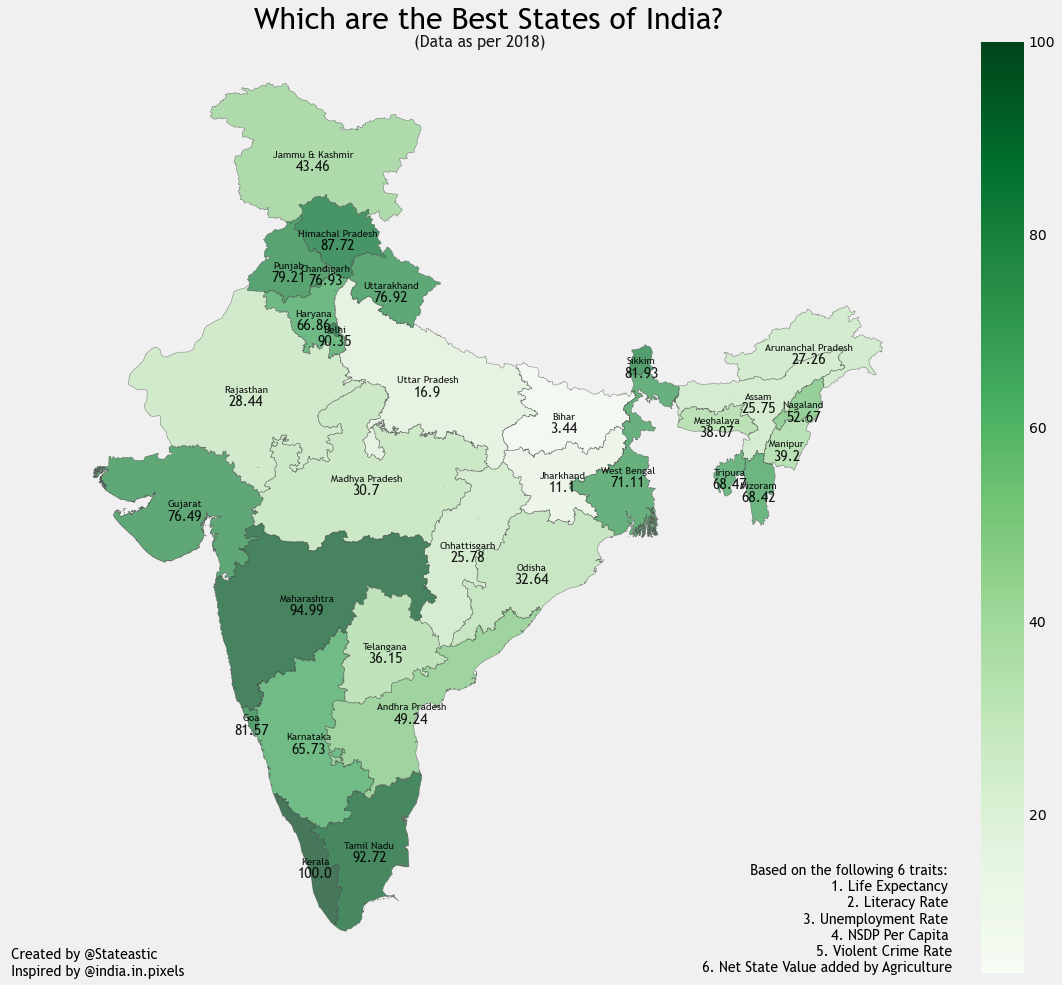

In [237]:
#Create figure and axes
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(1, figsize=(18, 16))
ax.axis('off')

fig = merged.plot(column='Best State', cmap='Greens', linewidth=0.5, ax=ax, edgecolor='0.3', alpha =0.7, legend=True)

#state names to the map
for i in range(len(merged)):
    ax.text(merged.geometry[i].centroid.x, merged.geometry[i].centroid.y, merged.index[i],
            fontsize=10,
            fontname='Trebuchet MS',
            color='Black',
            ha='center',
            va='center',
            alpha = 0.9)

#values below the names of the states
for i in range(len(merged)):
    ax.text(merged.geometry[i].centroid.x, merged.geometry[i].centroid.y-0.4, merged['Best State'][i],
            fontsize=14,
            fontname='Trebuchet MS',
            color='Black',
            ha='center',
            va='center',
            alpha = 0.9)


#Title and Texts
ax.set_title('Which are the Best States of India?',
            fontname='Trebuchet MS',
            fontsize=30,
            loc='center',
            pad=20,
            color='Black',
            va = 'center',
            ha = 'center')
ax.text(82.5,38.5, "(Data as per 2018)", fontsize=16, fontname='Trebuchet MS', color='Black', ha='center', va='center', alpha = 0.9)

ax.text(100, 8.5, " Based on the following 6 traits: \n 1. Life Expectancy \n 2. Literacy Rate \n 3. Unemployment Rate \n 4. NSDP Per Capita \n 5. Violent Crime Rate\n 6. Net State Value added by Agriculture", 
fontname = 'Trebuchet MS', fontsize = 14, color = 'Black', ha = 'right', va = 'center')

ax.text(65, 7, " Created by @Stateastic \n Inspired by @india.in.pixels", 
fontname = 'Trebuchet MS', fontsize = 14, color = 'Black', ha = 'left', va = 'center')

#save the figure
plt.savefig('Best State of India.png', dpi=500, bbox_inches='tight')